## Предисловие

Чтобы ```ffmpeg``` работал проще всего скачать собранную версию [link](https://ffmpeg.org/download.html) и скопировать ```ffmpeg.exe``` в папку с этим ноутбуком.

Оно ещё довольно легко крашится.

In [1]:
from pathlib import Path

import ffmpeg
%matplotlib inline
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fft import fftshift
from scipy.io import wavfile

In [2]:
DIR = "data"
# FILE w/o .mp3 extension
FILE = "01 - Cry For The Moon (The Embrace That Smothers - Part IV) (Single Version)"
# FILE = "01 - Mea Culpa"
# FILE = "03 - Harvester Of Sorrow"
# FILE = "09 - Exspes"
# FILE = "11. Dehumanization"

#### Задание 1

In [3]:
# mp3 -> wav
in_file = f"{DIR}/{FILE}.mp3"
out_file = f"{DIR}/{FILE}.wav"
(
    ffmpeg
    .input(in_file)
    .output(out_file, acodec="pcm_s16le", ar="44100")
    .run(overwrite_output=True)
)

(None, None)

In [4]:
# cut random 10-sec sample
in_file = f"{DIR}/{FILE}.wav"
out_file = f"{DIR}/{FILE}_cut.wav"

fs, audio = wavfile.read(in_file)
audio = audio[:, 0]
low = len(audio) // 4
high = 3 * len(audio) // 4 - 10 * fs
r = np.random.randint(low, high)
cut = audio[r:r + 10 * fs]
wavfile.write(f"{out_file}", fs, cut)

In [13]:
in_file = f"{DIR}/{FILE}_cut.wav"
out_file_wav = f"{DIR}/{FILE}_filtered.wav"

fs, audio = wavfile.read(in_file)

sos = signal.butter(10, 5000, btype="lowpass", analog=False, output="sos", fs=fs)
filtered = signal.sosfilt(sos, audio)
filtered /= np.max(filtered)

wavfile.write(out_file_wav, fs, filtered)

In [14]:
def make_plot(audio: list, audio_filtered: list, fs=44_100):
    gs0 = gs.GridSpec(2,2, width_ratios=[10, 0.1])
    fig = plt.figure(figsize=(10,5), dpi=150)
    ax1 = fig.add_subplot(gs0[0,0])
    ax1.set_title("Original")
    ax2 = fig.add_subplot(gs0[1,0])
    ax2.set_title("Filtered")
    cax = fig.add_subplot(gs0[:,1])

    spectrum1, freqs1, t1, im1 = ax1.specgram(audio, NFFT=1024, Fs=fs, noverlap=900)
    spectrum2, freqs2, t2, im2 = ax2.specgram(audio_filtered, NFFT=1024, Fs=fs, noverlap=900)

    fig.colorbar(im1, cax=cax)

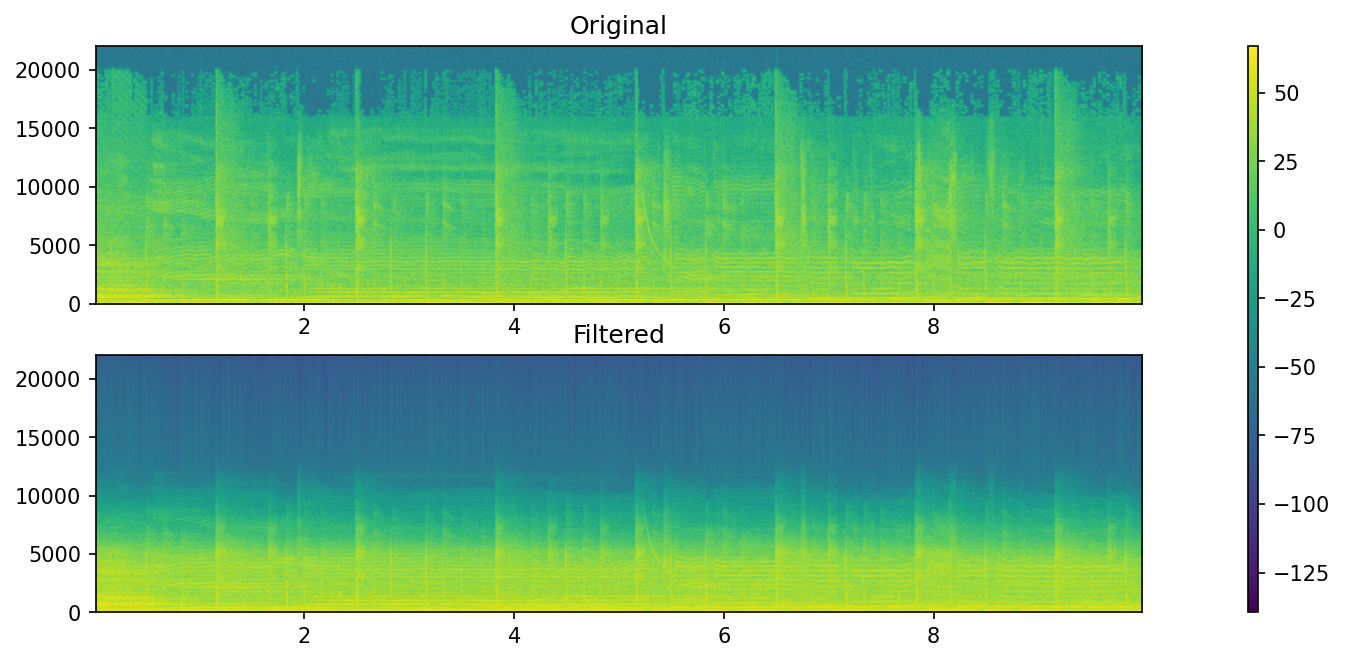

In [15]:
in_file = f"{DIR}/{FILE}_cut.wav"
in_file_filtered = f"{DIR}/{FILE}_filtered.wav"

fs, audio = wavfile.read(in_file)
_, audio_filtered = wavfile.read(in_file_filtered)

make_plot(audio, audio_filtered)

#### Задание 2

Can't be bothered.

#### Задание 3

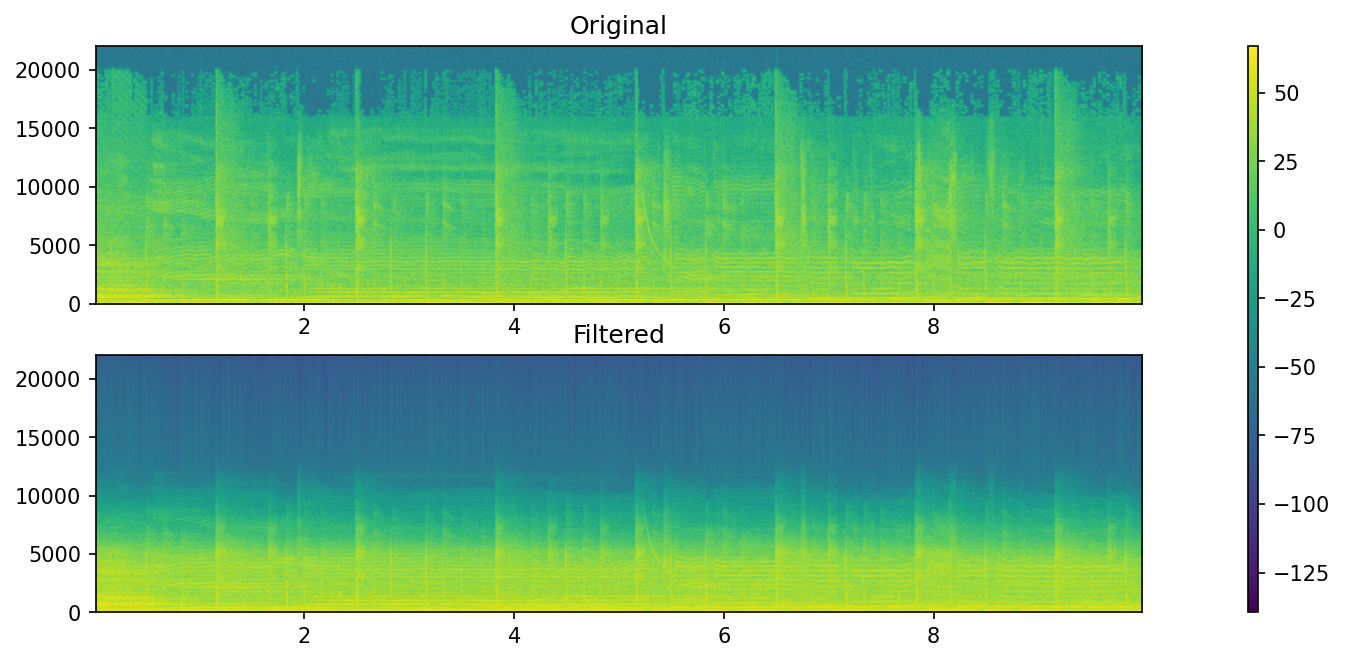

In [16]:
in_file = f"{DIR}/{FILE}_cut.wav"
out_file_wav = f"{DIR}/{FILE}_filtered.wav"

fs, audio = wavfile.read(in_file)

sos = signal.ellip(10, 1, 1, [3000, 6000], btype="bandstop", analog=False, output="sos", fs=fs)
f0 = signal.sosfilt(sos, audio)
sos = signal.ellip(10, 1, 1, [10000, 13000], btype="bandstop", analog=False, output="sos", fs=fs)
filtered = signal.sosfilt(sos, f0)

make_plot(audio, audio_filtered)

#### Задание 4

Не сделал. Но задание хорошее.